# **Librería de visualización de *Python*: *Matplotlib* (parte 2)**
---
 

En este material se explican algunas de las características más avanzadas de *Matplotlib*. Aunque posiblemente no sea necesario estudiar en profundidad los siguientes apartados de esta guía, resulta conveniente que conozca el amplio abanico de posibilidades que tiene a su disposición en caso de necesitar alguna de estas funcionalidades avanzadas en el futuro.
    


In [1]:
# Importar Matplotlib.

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Importar Pandas y NumPy.

import pandas as pd
import numpy as np

In [3]:
# Datos usados en este material.

x = np.linspace(0, 5, 10) 
y = x**2   

## **6. Casos de uso avanzados**
---

A continuación se presentan algunos métodos y configuraciones disponibles en *Matplotlib* para casos especiales.


### **6.1. Escala logarítmica**
---
Es posible establecer una escala logarítmica para uno o ambos ejes. Esta funcionalidad es, de hecho, solo una aplicación de un sistema de transformación más general en *Matplotlib*. Cada una de las escalas de los ejes se establece por separado utilizando los métodos **`set_xscale`** y **`set_yscale`** que aceptan un parámetro (con el valor **`"log"`** en este caso):


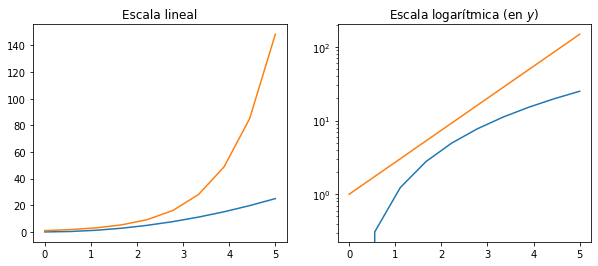

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
#Escala lineal      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Escala lineal")


#Escala logarítmica
axes[1].plot(x, x**2, x, np.exp(x))

#########################
axes[1].set_yscale("log")
##########################

axes[1].set_title("Escala logarítmica (en $y$)");

### **6.2. Colocación de marcas y etiquetas personalizadas**
---

Podemos determinar explícitamente dónde queremos las marcas (*ticks*) de los ejes con **`set_xticks`** y **`set_yticks`**, que toman una lista de valores de dónde se colocarán los *ticks* en el eje. También podemos usar los métodos **`set_xticklabels`** y **`set_yticklabels`** para proporcionar una lista de etiquetas de texto personalizadas para cada ubicación de las marcas:

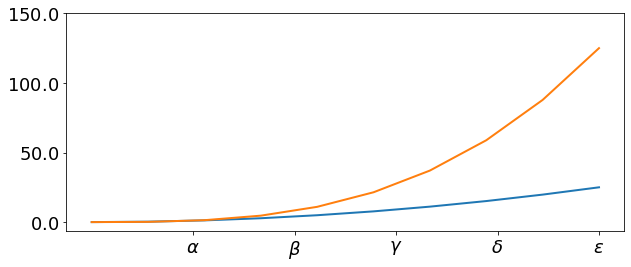

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

#########
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18) # Cadenas de texto con formato LaTeX.

ax.set_yticks([0, 50, 100, 150])
ax.set_yticklabels(["$%.1f$" % y for y in [0, 50, 100, 150]], fontsize=18); # Cadenas de texto con formato LaTeX.
#########

Hay una serie de métodos más avanzados para controlar la colocación de marcas mayores y menores en las figuras de *Matplotlib*, como la colocación automática de acuerdo con diferentes políticas. Vea el siguiente [enlace](https://matplotlib.org/stable/api/ticker_api.html) para más detalles.


### **6.3. Notación científica**
---

Muchas veces es mejor usar notación científica cuando tenemos números grandes en los ejes. Para esto usamos el submódulo de *Matplotlib* **`ticker`**, que provee una mayor personalización a los ticks de las visualizaciones en *Matplotlib*.

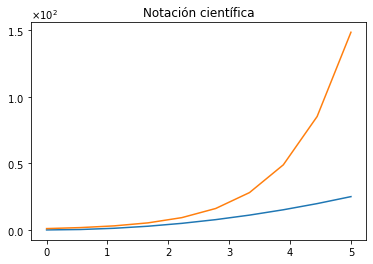

In [6]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Notación científica")

ax.set_yticks([0, 50, 100, 150])
#########
from matplotlib import ticker # Submódulo de Matplotlib para el manejo avanzado de ticks.

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
#########

### **6.4. Espaciado de las etiquetas de los ejes**
---

El manejo del espacio en las visualizaciones de *Matplotlib* es completamente personalizable. Uno de los casos más comunes es la ubicación de texto, como en el caso de las etiquetas de los ejes de una gráfica. Esto es posible accediendo al atributo **`labelpad`** de los ejes **`xaxis`** y **`yaxis`** de un objeto **`Axes`**.

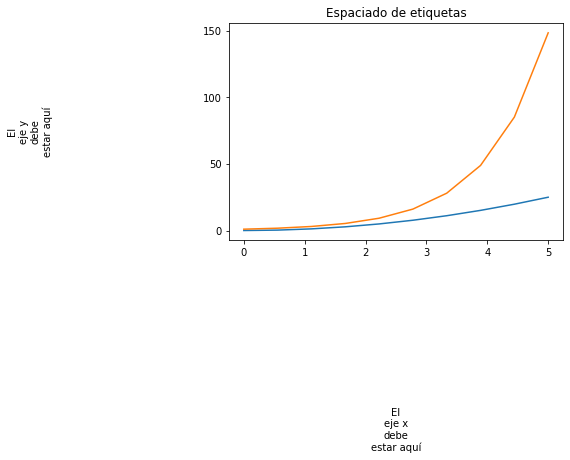

In [7]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("Espaciado de etiquetas")

#########
# Espaciado entre números y etiquetas de los ejes
ax.xaxis.labelpad = 150
ax.yaxis.labelpad = 150
#########

ax.set_xlabel("El\neje x\ndebe\nestar aquí")
ax.set_ylabel("El\neje y\ndebe\nestar aquí");

#### **6.4.1. Ajustes a la posición de los ejes**
---
A veces cuando se guardan las figuras en archivos, las etiquetas de los ejes se recortan. Es necesario ajustar la posición de los ejes ligeramente. Esto se puede lograr con el método **`subplots_adjust`**.

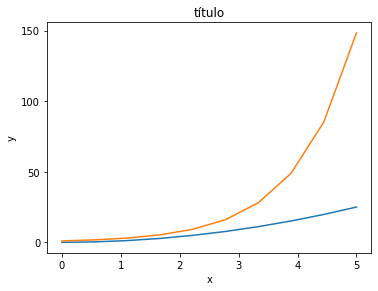

In [8]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])
ax.set_title("título")
ax.set_xlabel("x")
ax.set_ylabel("y")

#########
fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9)
#########

### **6.5. Visualización de cuadrícula o *grid***
---
Con el método **`grid`** en el objeto del eje, podemos activar y desactivar las líneas de la cuadrícula. También podemos personalizar el aspecto de las líneas de cuadrícula utilizando los mismos argumentos de palabra clave usados en la función **`plot`**:


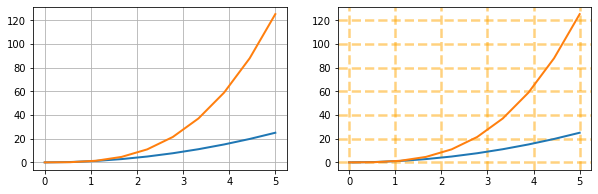

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid
axes[0].plot(x, x**2, x, x**3, lw=2)

#########
axes[0].grid(True)
axes[0].set_facecolor("white")
#########


# grid personalizado
axes[1].plot(x, x**2, x, x**3, lw=2)

#########
axes[1].grid(color='orange', alpha=0.5, linestyle='dashed', linewidth=2.5)
#########

### **6.6. Estilo de ejes**
---
Los ejes (no confundir con los objetos **`Axes`**) se pueden modificar de varias maneras. Una de las formas es modificar su estilo, accediendo a los objetos que los representan (Objetos **`Spines`**).

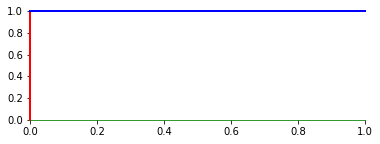

In [10]:
fig, ax = plt.subplots(figsize=(6,2))

#########
ax.spines['bottom'].set_color('green') # Eje inferior.
ax.spines['top'].set_color('blue')     # Eje superior.  
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_color('red')     # Eje izquierdo.  
ax.spines['left'].set_linewidth(2)
#########


# desactivar eje a la derecha
ax.spines['right'].set_color("none")    # Eje derecho.
ax.yaxis.tick_left() # solo ticks a la izquierda
#########

#### **6.6.1. Ejes gemelos**
---
Algunas veces es útil tener dos ejes $x$ o $y$ en una figura; por ejemplo, al trazar dos curvas con diferentes unidades de medida. *Matplotlib* soporta esta codificación con las funciones **`twinx`** y **`twiny`**:


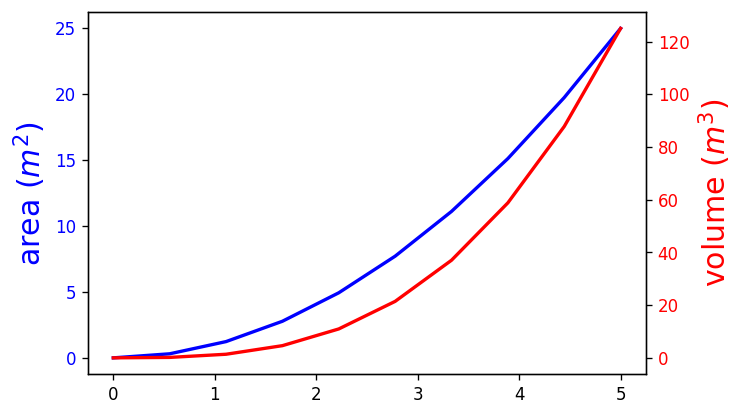

In [11]:
fig, ax1 = plt.subplots(dpi = 120)

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")

for label in ax1.get_yticklabels():
    label.set_color("blue") # Se cambia el color de sus etiquetas para distinguir entre ambos ejes.

#########    
ax2 = ax1.twinx() # Nuevo objeto Axes, gemelo de ax1.
#########


ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

#### **6.6.2. Ejes centrados en $0,0$**
---
Por defecto, los ejes o *Spines* en *Matplotlib* rodean las figuras en forma de rectángulo. Con el método **`set_position`** de los objetos **`Spines`** se puede cambiar el centro de los ejes, en donde se cruzan, típicamente ubicado en $0,0$.


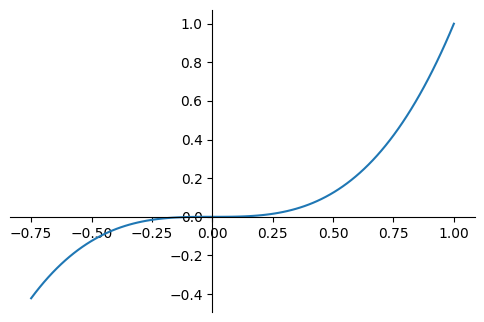

In [12]:
fig, ax = plt.subplots(dpi = 100)

ax.spines['right'].set_color('none') # No se muestran los ejes de la parte superior y derecha.
ax.spines['top'].set_color('none')

#########
#ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # Configura la posición del eje x en x=0.

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # Configura la posición del eje y en y=0.
#########

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### **6.7. Otros estilos de gráficos 2D**
---
Además del método común **`plot`**, hay varias funciones para generar diferentes tipos de gráficos. Consulte la [galería](http://matplotlib.org/gallery.html) de *Matplotlib* para obtener una lista completa: Algunos de los más útiles se muestran a continuación:

* **`step`**: Gráfico de pasos o de escalera.
* **`bar`**: Gráfica de barras (Similar a los histogramas).
* **`fill_between`**: Gráfica de área entre dos curvas.
* **`axvline` | `axhline`**: Líneas verticales y horizontales.

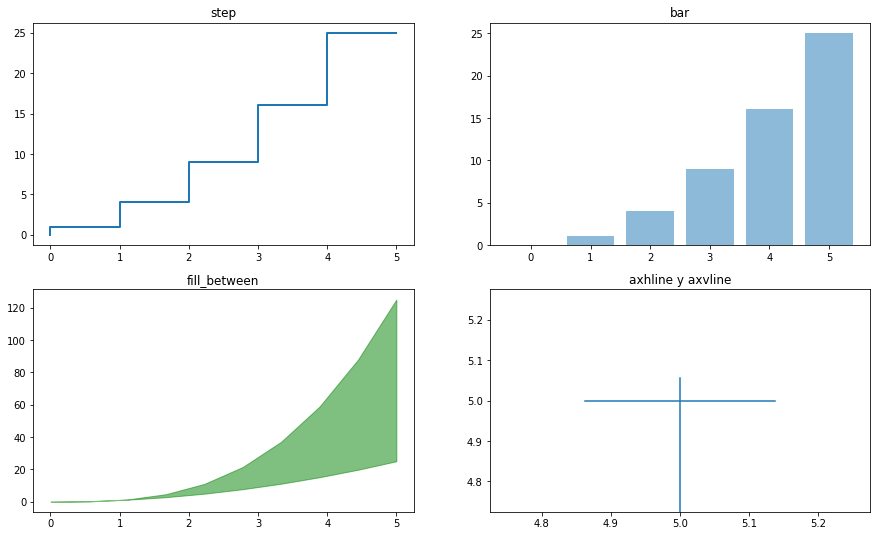

In [13]:
n = np.array([0,1,2,3,4,5])

fig, axes = plt.subplots(2, 2, figsize=(15, 9))

axes[0,0].step(n, n**2, lw=2)
axes[0,0].set_title("step")

axes[0,1].bar(n, n**2, align="center", width=0.8, alpha=0.5)
axes[0,1].set_title("bar")

axes[1,0].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[1,0].set_title("fill_between");

axes[1,1].axhline(5, 0.25, 0.75);
axes[1,1].axvline(5, 0, 0.6);
axes[1,1].set_title("axhline y axvline");

### **6.8. Anotaciones de texto**
---
Se puede anotar texto en figuras de *Matplotlib* usando la función **`text`**. Es compatible con el formato *LaTeX* al igual que los textos y títulos de las etiquetas de ejes:

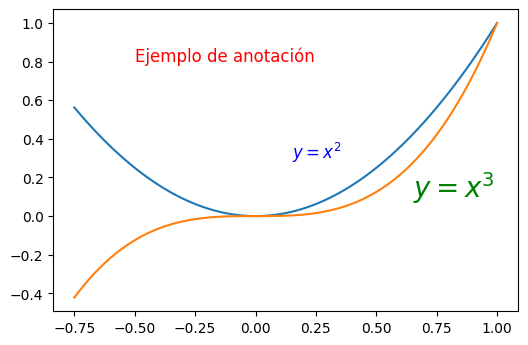

In [14]:
fig, ax = plt.subplots(dpi = 100)
ax.plot(xx, xx**2, xx, xx**3)

#########
ax.text(0.15, 0.3, # Las posiciones son la posición numérica en cada eje, entre 0 y 1.
        r"$y=x^2$", 
        fontsize=12, 
        color="blue")

ax.text(-0.5, 0.8,
        r"Ejemplo de anotación", 
        fontsize=12, 
        color="red")

ax.text(0.65, 0.1,
        r"$y=x^3$", 
        fontsize=20, 
        color="green");
#########

### **6.9. Personalización de subfiguras múltiples**
---

Se pueden agregar manualmente ejes a una figura de *Matplotlib* usando **`fig.add_axes`** o usando un administrador de diseño de subfiguras como **`subplots`**, **`subplot2grid`** o **`gridspec`**:

#### **6.9.1. Método `subplots`**
---

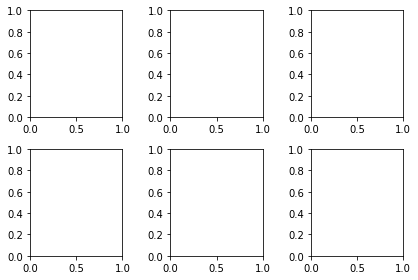

In [15]:
#Versión más común y sencilla de componer múltiples subfiguras.

fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### **6.9.2. Método `subplot2grid`**
---
Se pueden componer las gráficas utilizando un sistema de cuadricula con la opción de combinar celdas. Para esto se utiliza el método **`subplot2grid`** de manera similar al uso dado del método **`subplots`**.

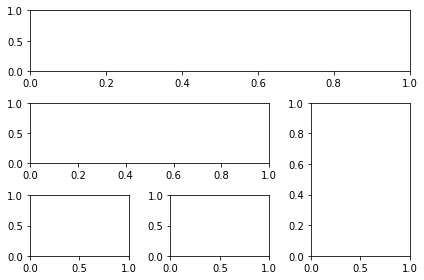

In [16]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3) # Va a ocupar 3 columnas
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2) # Va a ocupar 2 columnas
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2) # Va a ocupar 2 filas
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### **6.9.3. Método `gridspec`**
---
Si se requiere una manipulación más profunda se puede utilizar el submódulo de *Matplotlib* **`gridspec`**. Con este se pueden definir rápidamente cuadriculas de objetos **`Axes`** a partir de sus relaciones de aspecto.

In [17]:
#Importamos el submódulo gridspec
import matplotlib.gridspec as gridspec

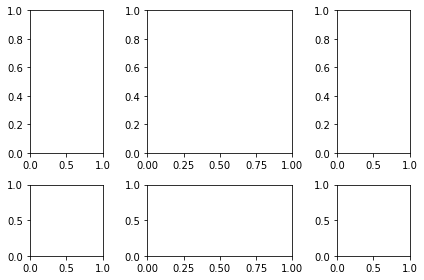

In [18]:
#Versión más personalizable de las relaciones de aspecto 
#de las subfiguras de una visualización.

fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### **6.9.4. Método `add_axes`**
---

Finalmente, es posbile agregar ejes manualmente con **`add_axes`**. Esto es útil para agregar inserciones a figuras utilizadas previamente.

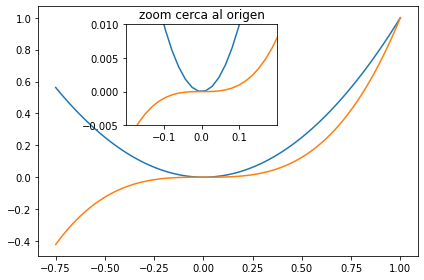

In [19]:
# Ubicar subfiguras en cualquier posición (incluso superpuesta a otra subfigura)

fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# Inserción
inset_ax = fig.add_axes([0.3, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom cerca al origen')

# Rango del eje
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# Ubicación de las marcas del eje
inset_ax.set_yticks([-0.005,0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

## **7. Figuras 3D**
---
*Matplotlib* cuenta con la posibilidad de generar gráficas de $3$ dimensiones. Para usar visualizaciones 3D en *Matplotlib*, primero necesitamos crear una instancia de la clase **`Axes3D`**.

In [20]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

 Antes de empezar crearemos los datos para graficar en 3D.

In [21]:
#Datos iniciales
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [22]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

### **7.1. Superficies**
---
Los ejes 3D se pueden agregar a un canvas de figuras exactamente de la misma manera que los ejes 2D; o de una forma más conveniente, pasando un argumento de palabra clave **`projection = '3d'`** a los métodos **`add_axes`** o **`add_subplot`**.

> **Nota:** La visualización de objetos en 3D tiene un mayor costo computacional y por tanto puede tardar más en generarse.

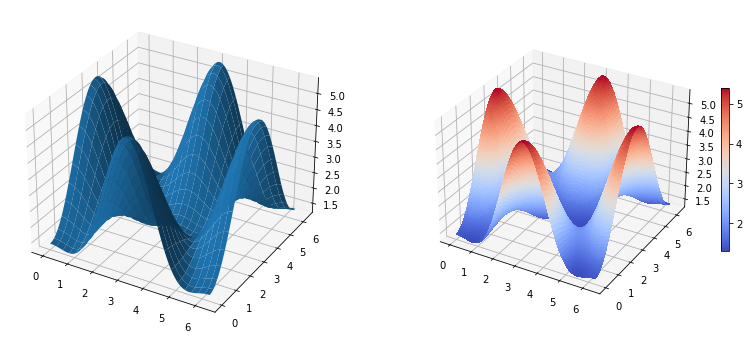

In [23]:
fig = plt.figure(figsize=(14,6))

# `ax` es un eje 3D por el parámetro projection='3d' en add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# superficie con graduación de color y barra de color
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

Además de las superficies básicas, *Matplotlib* cuenta con los gráficos de malla de tipo *Wire frame*, generados con el método **`plot_wireframe`**.




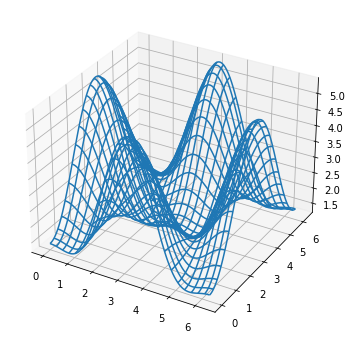

In [24]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

Con el método **`contour`** se pueden generar visualizaciones en 2D proyectadas en los planos de fondo de una visualización 3D que representen el contorno de la superficie representada por los mismos datos.

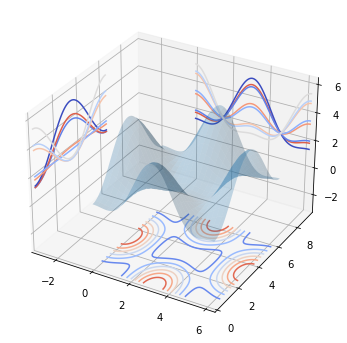

In [25]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=mpl.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=mpl.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=mpl.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

En la próxima unidad exploraremos librerías para la visualización interactiva de datos que podrán facilitar la exploración en detalle de gráficas en 2 y 3 dimensiones.

## **Recursos adicionales**
---
Los siguientes enlaces corresponden a sitios en donde encontrará información muy útil para profundizar en el conocimiento de las funcionalidades de la librería *Matplotlib*:


* [*Matplotlib*: Visualization with Python](http://www.matplotlib.org) 
* [Matplotlib Gallery - (Ejemplos)](http://matplotlib.org/gallery.html) - Se recomienda revisar la galería y ajustar el código de las visualizaciones requeridas.
* [Nicolas P. Rougier - *Matplotlib* tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)
* [IBM (Coursera) - Data Visualization with *Python*](https://www.coursera.org/learn/python-for-data-visualization)
* [DataCamp - Introduction to Data Visualization with *Matplotlib*](https://www.datacamp.com/courses/introduction-to-matplotlib)

